# Linear Regresstion Model

Simple Linear Regression model

$
y = a + bx
$

we expect the following values to be predicted via training as close as possible: 

$
a = 1\\
b = 2
$

## Warm Up

In [1]:
import numpy as np

# mean = average
mean_val = np.array([1, 3, 5, 11]).mean()
print(mean_val)

5.0


## Sample Data Generation

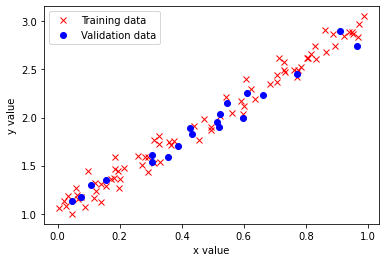

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# generate sample data
np.random.seed(42)
a_answer = 1
b_answer = 2
x = np.random.rand(100, 1)
y = a_answer + b_answer * x + .1 * np.random.randn(100, 1)

# shuffles the indices
idx = np.arange(100)
np.random.shuffle(idx)

# uses first 80 random indices for train
train_idx = idx[:80]
# uses the remaining indices for validation
eval_idx = idx[80:]

# generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_eval, y_eval = x[eval_idx], y[eval_idx]

plt.plot(x_train, y_train, 'x', color='r', label='Training data')
plt.plot(x_eval, y_eval, 'o', color='b', label='Validation data')
plt.xlabel(r'x value')
plt.ylabel(r'y value')
plt.legend(loc='best')
plt.show()

## Formula

**Mean Square Error (MSE)** means **loss**

$$
MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - (a + bx_i))^2
$$

Gradients Calculation

$$
a\_grad = -2 \times \sum_{i=1}^{N}\big(y_i - (a + bx_i)\big)\\
b\_grad = -2 \times \sum_{i=1}^{N}\big(y_i - (a + bx_i)) \times (x_i) \big)
$$

## Numpy Approach

In [3]:
# Sets learning rate
lr = 1e-1
# Defines number of epochs
n_epochs = 1000

# Initializes parameters "a" and "b" randomly
np.random.seed(42)
a = np.random.randn(1)
b = np.random.randn(1)

for epoch in range(n_epochs):
    # Computes our model's predicted output
    yhat = a + b * x_train
    
    # How wrong is our model? That's the error! 
    error = (y_train - yhat)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()
    
    # Computes gradients for both "a" and "b" parameters
    a_grad = -2 * error.mean()
    b_grad = -2 * (x_train * error).mean()
    
    # Updates parameters using gradients and the learning rate
    a = a - lr * a_grad
    b = b - lr * b_grad
    
print(a, b)

[1.02354094] [1.96896411]


## Scikit-learn Approach

In [4]:
# Sanity Check: do we get the same results as our gradient descent?
from sklearn.linear_model import LinearRegression

linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[1.02354075] [1.96896447]


## PyTorch Approach

In [5]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

# Our data was in Numpy arrays, but we need to transform them into PyTorch's Tensors
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

# Here we can see the difference - notice that .type() is more useful
# since it also tells us WHERE the tensor is (device)
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

cpu
<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.FloatTensor


### Manual Parameters Update

In [6]:
# Sets learning rate
lr = 1e-1
# Defines number of epochs
n_epochs = 1000

# Initializes parameters "a" and "b" randomly
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()

    # No more manual computation of gradients using PyTorch! 
    # a_grad = -2 * error.mean()
    # b_grad = -2 * (x_tensor * error).mean()
    
    # We just tell PyTorch to work its way BACKWARDS from the specified loss!
    loss.backward()
    # Let's check the computed gradients...
    # print(a.grad)
    # print(b.grad)
    
    # What about UPDATING the parameters?
    # We need to use NO_GRAD to keep the update out of the gradient computation
    # Why is that? It boils down to the DYNAMIC GRAPH that PyTorch uses...
    with torch.no_grad():
        a -= lr * a.grad
        b -= lr * b.grad
    
    # PyTorch is "clingy" to its computed gradients, we need to tell it to let it go...
    # In PyTorch, every method that ends with an underscore (_) makes changes in-place,
    # meaning, they will modify the underlying variable.
    a.grad.zero_()
    b.grad.zero_()
    
print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)
tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


### Using PyTorch Optimizer

In [7]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

lr = 1e-1
n_epochs = 1000

# Defines a SGD optimizer to update the parameters
optimizer = torch.optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()

    loss.backward()    
    
    # No more manual update!
    # with torch.no_grad():
    #     a -= lr * a.grad
    #     b -= lr * b.grad
    optimizer.step()
    
    # No more telling PyTorch to let gradients go!
    # a.grad.zero_()
    # b.grad.zero_()
    optimizer.zero_grad()
    
print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)
tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


### Using PyTorch Loss

In [8]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

lr = 1e-1
n_epochs = 1000

# Defines a MSE loss function
loss_fn = torch.nn.MSELoss(reduction='mean')

optimizer = torch.optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    
    # No more manual loss!
    # error = y_tensor - yhat
    # loss = (error ** 2).mean()
    loss = loss_fn(y_train_tensor, yhat)

    # Computes gradients
    loss.backward()
    # Updates parameters and zeroes gradients
    optimizer.step()
    optimizer.zero_grad()
    
print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)
tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


### Using Model Approach

Using Model, we can organize code more in modular way

In [9]:
class ManualLinearRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # To make "a" and "b" real parameters of the model, we need to wrap them with nn.Parameter
        self.a = torch.nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.b = torch.nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    
    def forward(self, x):
        # Computes the outputs / predictions
        return self.a + self.b * x

torch.manual_seed(42)

# Now we can create a model and send it at once to the device
model = ManualLinearRegression().to(device)
# We can also inspect its parameters using its state_dict
print(model.state_dict())

lr = 1e-1
n_epochs = 1000

loss_fn = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_epochs):
    # train() does NOT perform a training step.
    # Its only purpose is to set the model to training mode.
    # Some models use mechanisms like Dropout which have distinct behaviors in training and evaluation phases.
    model.train()

    # No more manual prediction!
    # yhat = a + b * x_tensor
    yhat = model(x_train_tensor)

    # Computes loss
    loss = loss_fn(y_train_tensor, yhat)
    # Computes gradients
    loss.backward()
    # Updates parameters and zeroes gradients
    optimizer.step()
    optimizer.zero_grad()

print(model.state_dict())

OrderedDict([('a', tensor([0.3367])), ('b', tensor([0.1288]))])
OrderedDict([('a', tensor([1.0235])), ('b', tensor([1.9690]))])


### Using PyTorch Build-in Model

In [10]:
torch.manual_seed(42)

# Now we can create a model and send it at once to the device
model = torch.nn.Sequential(torch.nn.Linear(1,1)).to(device)
# We can also inspect its parameters using its state_dict
print(model.state_dict())

lr = 1e-1
n_epochs = 1000

loss_fn = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_epochs):
    # train() does NOT perform a training step.
    # Its only purpose is to set the model to training mode.
    # Some models use mechanisms like Dropout which have distinct behaviors in training and evaluation phases.
    model.train()

    # No more manual prediction!
    # yhat = a + b * x_tensor
    yhat = model(x_train_tensor)

    # Computes loss
    loss = loss_fn(y_train_tensor, yhat)
    # Computes gradients
    loss.backward()
    # Updates parameters and zeroes gradients
    optimizer.step()
    optimizer.zero_grad()

print(model.state_dict())

OrderedDict([('0.weight', tensor([[0.7645]])), ('0.bias', tensor([0.8300]))])
OrderedDict([('0.weight', tensor([[1.9690]])), ('0.bias', tensor([1.0235]))])


### Using and PyTorch TensorDataset Dataloader

Until now, we have used the whole training data at every training step. It has been batch gradient descent all along. This is fine for our ridiculously small dataset, but if we want to go serious about all this, we must use mini-batch gradient descent. Thus, we need mini-batches.

In [11]:
from torch.utils.data import TensorDataset, DataLoader

# Data Setup
x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()
train_data = TensorDataset(x_train_tensor, y_train_tensor)
print(train_data[0])
# mini-bach config
train_loader = DataLoader(dataset=train_data, batch_size=16, shuffle=True)

model = torch.nn.Sequential(torch.nn.Linear(1,1)).to(device)
# We can also inspect its parameters using its state_dict
print(model.state_dict())

lr = 1e-1
n_epochs = 1000

losses = []
loss_fn = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_epochs):
    for x_batch, y_batch in train_loader:
        # the dataset "lives" in the CPU, so do our mini-batches
        # therefore, we need to send those mini-batches to the
        # device where the model "lives"
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        # train() does NOT perform a training step.
        # Its only purpose is to set the model to training mode.
        # Some models use mechanisms like Dropout which have distinct behaviors in training and evaluation phases.
        model.train()

        # No more manual prediction!
        # yhat = a + b * x_tensor
        yhat = model(x_train_tensor)

        # Computes loss
        loss = loss_fn(y_train_tensor, yhat)
        # Computes gradients
        loss.backward()
        # Updates parameters and zeroes gradients
        optimizer.step()
        optimizer.zero_grad()
        # record loss
        losses.append(loss)

print(model.state_dict())

(tensor([0.7713]), tensor([2.4745]))
OrderedDict([('0.weight', tensor([[-0.2343]])), ('0.bias', tensor([0.9186]))])
OrderedDict([('0.weight', tensor([[1.9690]])), ('0.bias', tensor([1.0235]))])


### Evaluation

In [12]:
# Data Setup
x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()
train_data = TensorDataset(x_train_tensor, y_train_tensor)
x_val_tensor = torch.from_numpy(x_eval).float()
y_val_tensor = torch.from_numpy(y_eval).float()
val_data = TensorDataset(x_val_tensor, y_val_tensor)
print(train_data[0])
# mini-bach config
train_loader = DataLoader(dataset=train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(dataset=val_data, batch_size=16, shuffle=True)

model = torch.nn.Sequential(torch.nn.Linear(1,1)).to(device)
# We can also inspect its parameters using its state_dict
print(model.state_dict())

lr = 1e-1
n_epochs = 1000

losses = []
val_losses = []
loss_fn = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_epochs):
    for x_batch, y_batch in train_loader:
        # the dataset "lives" in the CPU, so do our mini-batches
        # therefore, we need to send those mini-batches to the
        # device where the model "lives"
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        # train() does NOT perform a training step.
        # Its only purpose is to set the model to training mode.
        # Some models use mechanisms like Dropout which have distinct behaviors in training and evaluation phases.
        model.train()

        # No more manual prediction!
        # yhat = a + b * x_tensor
        yhat = model(x_train_tensor)

        # Computes loss
        loss = loss_fn(y_train_tensor, yhat)
        # Computes gradients
        loss.backward()
        # Updates parameters and zeroes gradients
        optimizer.step()
        optimizer.zero_grad()
        # record loss
        losses.append(loss)
        
    # evaluation section
    with torch.no_grad():
        for x_val, y_val in val_loader:
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            
            model.eval()

            yhat = model(x_val)
            val_loss = loss_fn(y_val, yhat)
            val_losses.append(val_loss.item())
    
print(model.state_dict())

(tensor([0.7713]), tensor([2.4745]))
OrderedDict([('0.weight', tensor([[0.7827]])), ('0.bias', tensor([0.4601]))])
OrderedDict([('0.weight', tensor([[1.9690]])), ('0.bias', tensor([1.0235]))])
